In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr as pr

% matplotlib inline

In [3]:
# Load data
df = pd.read_csv("~/real_estate/data/v2/train_df.csv")
df = df.sort_values(by=["RegionName","year","month"])

# Store zipcodes
zipcodes = list(set(df["RegionName"]))

def get_zipcode_corr(regionname, var, target):
    
    subset = df.loc[df["RegionName"] == regionname]
    subset = subset.sort_values(by=["year","month"])
    var = subset[var].values
    target = subset[target].values
    
    corr_arrays = {}
    
    for i in range(1,13):
        target_ = target[i:]
        var_ = var[:-i]
        corr_arrays[str(i)] = (var_, target_)
    
    return corr_arrays

def get_var_corr(var, target):
    
    corr_arrays = {}
    for i in range(1,13):
        corr_arrays[str(i)] = ([],[])
    for i in zipcodes:
        arrays = get_zipcode_corr(i, var, target)
        for i in arrays.keys():
            var_ = arrays[i][0]
            target_ = arrays[i][1]
            corr_arrays[i][0].extend(var_)
            corr_arrays[i][1].extend(target_)
    return corr_arrays

def get_pearsonr(var, target):
    
    corr_arrays = get_var_corr(var, target)
    
    time_lag = list(range(1,13))
    pearsonr = []
    significance = []
    
    for key in corr_arrays.keys():
        pearsonr_ = pr(corr_arrays[key][0], corr_arrays[key][1])
        pearsonr.append(pearsonr_[0])
        significance.append(pearsonr_[1])
        
    width = 0.7
        
    fig, ax1 = plt.subplots()
    
    ax1.set_ylabel('pearson r')
    ax1.set_xlabel('time lag')
    ax1.bar(time_lag, pearsonr, width, color='blue')
    
    plt.title("Cross-Sectional Correlation: {}".format(var))
    plt.show()

In [4]:
temporal_vars = ['median_sqft_value_log','percent_decreasing','percent_increasing',
                 'zhvi_1bed_log','zhvi_2bed_log','zhvi_2bed_log','zhvi_sqft_value_log',
                 'zhvi_condo_log','zhvi_singlefam_log','90_day_treasury_bill_rate',
                 'mean_hourly_earnings_adj','mean_fixed_mortgage_rate','total_nonfarm_payroll',
                 'people_count_lag_log','adult_count_lag_log','mean_adjusted_income_lag_log',
                 'mean_adjusted_income_with_dep_lag_log','mean_real_estate_taxes_hh_lag_log',
                 'mean_mortgage_interest_hh_lag_log']

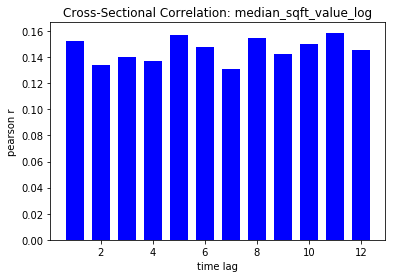

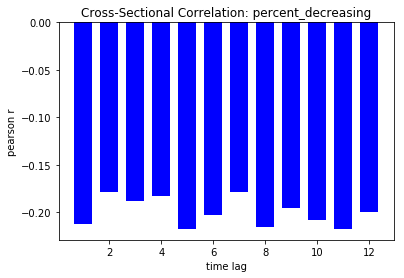

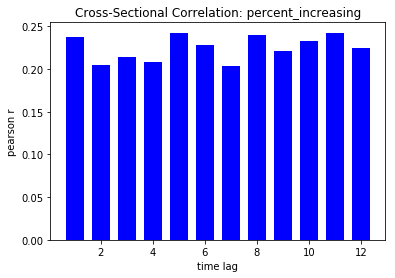

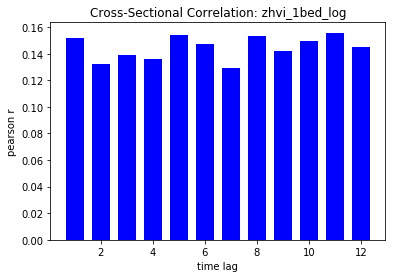

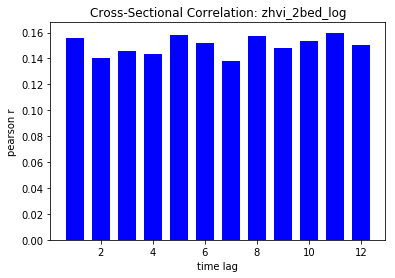

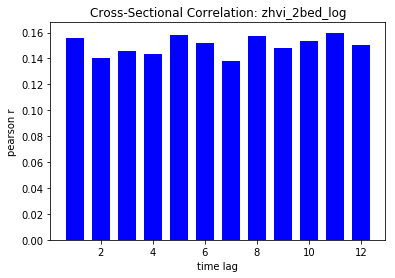

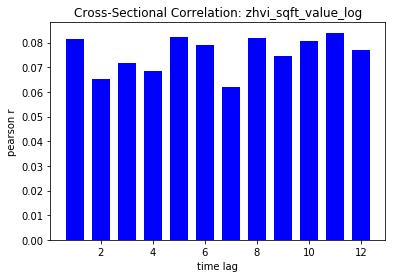

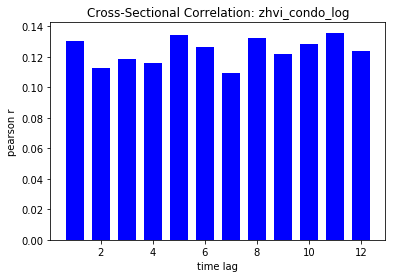

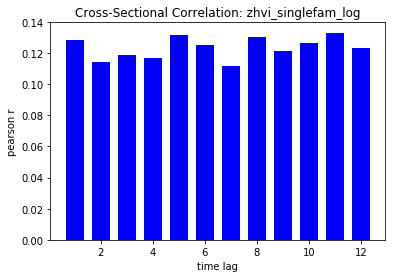

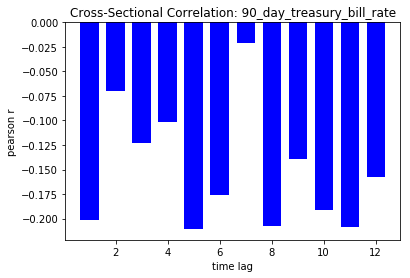

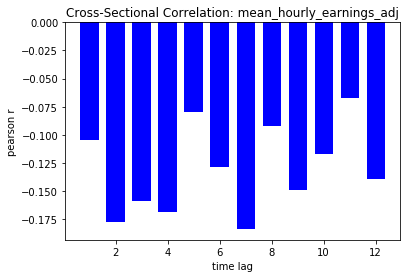

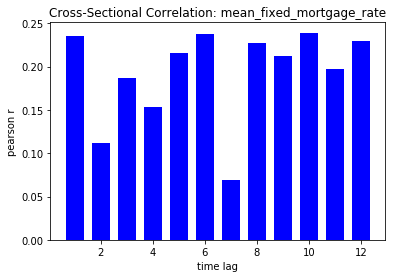

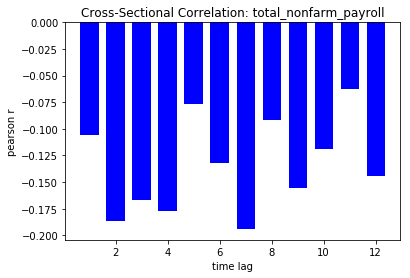

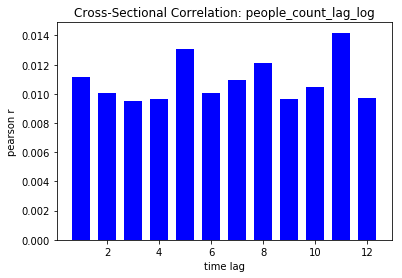

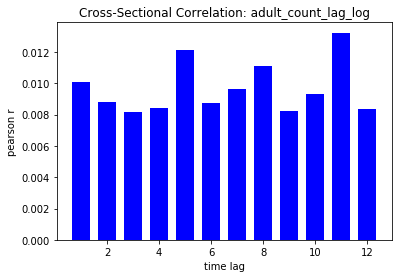

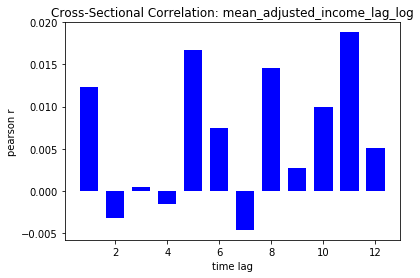

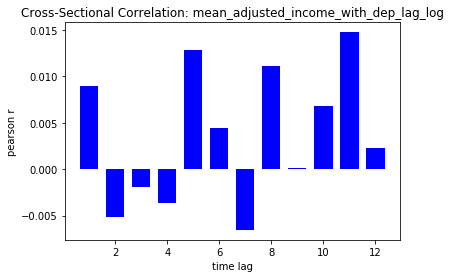

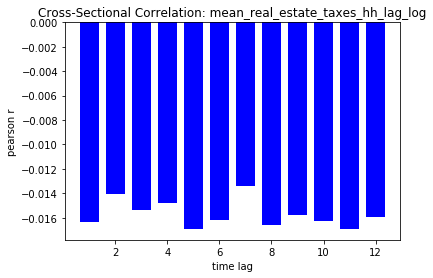

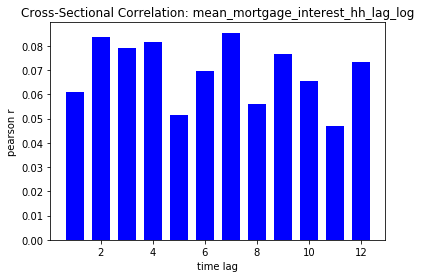

In [5]:
for i in temporal_vars:
    get_pearsonr(i, "target")